In [1]:
%reset

import numpy as np
import pickle as pk
import matplotlib.pyplot as pl
from astropy import units
from astropy import constants
import matplotlib
from astropy.io import fits
import pymaster as nmt
# %pylab inline
from pixell import enmap
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp
from pixell import reproject
# Color = ['#0072b1','#009d73','#d45e00','k', 'grey','yellow']
import healpy as hp
Color = ['k', '#000075', '#a9a9a9','#9A6324', '#808000','#aaffc3', '#fffac8'  ,'#800000', '#ffd8b1',]

font = {'size'   : 18}
matplotlib.rc('font', **font)
# # Latex stuff
pl.rc('text', usetex=False)
pl.rc('font', family='serif')

# %matplotlib inline




Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [26]:
ply = fits.open('/global/cfs/cdirs/des/shivamp/actxdes/data_set/planck_data/pl2015/nilc_ymaps.fits')  




In [27]:
yfull = ply[1].data['FULL']
ymask = ply[1].data['MASK']



In [17]:
clyy_hp = hp.anafast(yfull)



In [24]:
yfirst = ply[1].data['FIRST']
ylast = ply[1].data['LAST']
clyyfl_hp = hp.anafast(yfirst, ylast)




In [18]:
clyy_hp.shape


(6144,)

In [32]:
maskf = fits.open('/global/cfs/cdirs/des/shivamp/ACTxDESY3_data/planck_data/HFI_Mask_GalPlane-apo2_2048_R2.00.fits')  

ymask = hp.reorder(maskf[1].data['GAL060'],n2r=True)


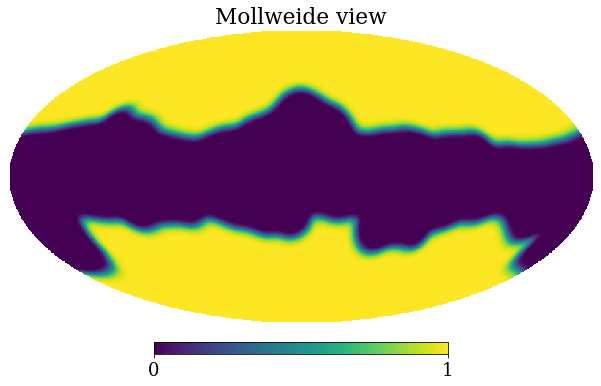

In [33]:
hp.mollview(ymask)



In [34]:
import pymaster as nmt
# mask_hp = nmt.mask_apodization(ymask, 0.1, apotype="Smooth")
mask_hp = ymask




In [35]:
nside_out = 2048
f_0 = nmt.NmtField(mask_hp, [yfull])  
b = nmt.NmtBin.from_nside_linear(nside_out, 20)
cl_00 = nmt.compute_full_master(f_0, f_0, b)




In [40]:
cl_00[0]


array([1.02925805e-15, 4.82690810e-16, 2.16534347e-16, 1.39724934e-16,
       1.15408761e-16, 1.03105244e-16, 9.41855927e-17, 8.30547264e-17,
       7.18459110e-17, 6.23155930e-17, 5.90479802e-17, 5.39039816e-17,
       5.14095740e-17, 4.83929309e-17, 4.40883692e-17, 4.36214503e-17,
       4.17822060e-17, 3.97957216e-17, 3.65573787e-17, 3.56444546e-17,
       3.34873313e-17, 3.15142306e-17, 3.04009394e-17, 2.85957806e-17,
       2.76333754e-17, 2.71254086e-17, 2.57511058e-17, 2.53828323e-17,
       2.45385193e-17, 2.24930489e-17, 2.13610532e-17, 2.04238065e-17,
       1.96311656e-17, 1.86334866e-17, 1.80804811e-17, 1.78078682e-17,
       1.71669404e-17, 1.60926303e-17, 1.57491303e-17, 1.44956506e-17,
       1.38792180e-17, 1.33891959e-17, 1.26687668e-17, 1.21897069e-17,
       1.16040241e-17, 1.10801966e-17, 1.06090111e-17, 1.00850954e-17,
       9.72775146e-18, 9.10327325e-18, 8.89576542e-18, 8.42985734e-18,
       8.14319491e-18, 7.67077258e-18, 7.33205467e-18, 6.94079125e-18,
      

In [36]:
import numpy as np
ell_arr = b.get_effective_ells()
np.savetxt('/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/data/Planck/planck_yy_total_full_mask60.txt',np.array([ell_arr, cl_00[0]]).T)   




In [41]:
df = np.loadtxt('/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/data/Planck/planck_yy_total_full_mask60.txt')  






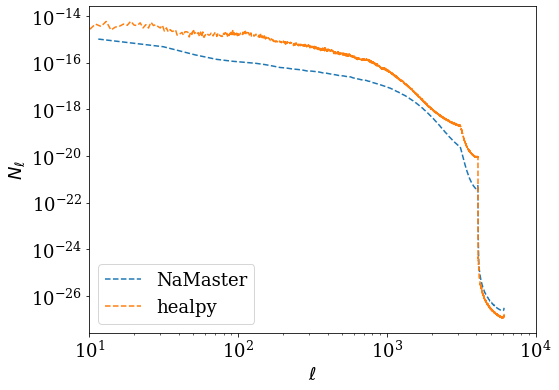

In [44]:
ell_hp = np.arange(len(clyy_hp))
fig, ax = pl.subplots(1,1)
fig.set_size_inches((8,6))  
# ax.errorbar(df[:,0], 1e12*(1./(2*np.pi))*(df[:,0])*(df[:,0] + 1.)*df[:,1],  label = r'$C^{yy}_{\ell} -$' + 'Theory', linestyle='--')
ax.errorbar(df[:,0], df[:,1],  label = r'NaMaster', linestyle='--')
ax.errorbar(ell_hp, clyy_hp,  label = r'healpy', linestyle='--')
# ax.errorbar(ell_hp,1e12 *(1./(2.*np.pi)) * (ell_hp) * (ell_hp+1) * clyy_hp,  label = r'Healpy', linestyle='--')
# ax.errorbar(ell_hp,1e12 *(1./(2.*np.pi)) * (ell_hp) * (ell_hp+1) * clyyfl_hp,  label = r'Healpy', linestyle='--')
# ax.errorbar(df[:,0], -1.*df[:,1],  label = r'$C^{yy}_{\ell} -$' + 'Theory', linestyle=':')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(1e1,1e4)
# ax.set_ylim(1e-22,1e-14)
# ax.set_ylim(1e-3,1e1)
ax.set_ylabel(r'$N_{\ell}$')
ax.set_xlabel(r'$\ell$')
ax.legend()





In [ ]:
hp.mollview(mask_hp)


In [6]:
ply_f = ply[1].data['FIRST']
ply_l = ply[1].data['LAST']



In [7]:
ply_diff = ply_f - ply_l



In [24]:
import healpy as hp
nly_pl = hp.anafast(ply_diff, lmax=6000)



In [25]:
l_cl = np.arange(len(nly_pl))





In [26]:
df = np.loadtxt('/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/data/Planck/planck_yy_noise_full_full_beamed.txt')



In [27]:
import scipy.interpolate as interpolate


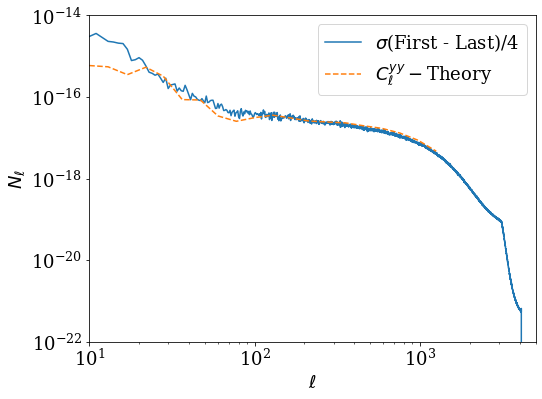

In [35]:
fig, ax = pl.subplots(1,1)
fig.set_size_inches((8,6))  
ax.errorbar(l_cl, nly_pl/4,  label = r'$\sigma$' + '(First - Last)/4', linestyle='-')
df_interp = interpolate.interp1d(np.log(df[:,0]),np.log(df[:,1]),fill_value='extrapolate')  
ax.errorbar(df[:,0], df[:,1],  label = r'$C^{yy}_{\ell} -$' + 'Theory', linestyle='--')
# ax.errorbar(l_cl, np.exp(df_interp(np.log(l_cl))),  label = 'from th', linestyle='-',color='k')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(1e1,5e3)
ax.set_ylim(1e-22,1e-14)
ax.set_ylabel(r'$N_{\ell}$')
ax.set_xlabel(r'$\ell$')
ax.legend()






In [36]:
np.savetxt('/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/data/Planck/planck_yy_noise_first_miuns_last_by_4_beamed.txt',np.array([l_cl[0:5000], nly_pl[0:5000]/4]).T)     




In [4]:
nside_out = 2048
lmax = 3*nside_out - 1

filename = '/global/cscratch1/sd/msyriac/data/depot/tilec/v1.2.0_20200324/map_v1.2.0_joint_deep56/tilec_single_tile_deep56_comptony_deprojects_cib_map_v1.2.0_joint_noise.fits'  

act_ymap_car = enmap.read_map(filename)

act_ymap_hp = reproject.healpix_from_enmap(act_ymap_car, lmax, nside_out)



/global/u1/s/spandey/self_module_ini/myenv3/lib/python3.7/site-packages/healpy/sphtfunc.py:824: UserWarning: Sigma is 0.000000 arcmin (0.000000 rad) 
  sigma * 60 * 180 / np.pi, sigma
/global/u1/s/spandey/self_module_ini/myenv3/lib/python3.7/site-packages/healpy/sphtfunc.py:829: UserWarning: -> fwhm is 0.000000 arcmin
  sigma * 60 * 180 / np.pi * (2.0 * np.sqrt(2.0 * np.log(2.0)))


In [12]:
act_ymap_car


ndmap([[           nan 3.82023911e-09 3.82557355e-09 ... 3.83080247e-09
  3.82557355e-09 3.82023911e-09]
 [5.63519484e-16 5.52374701e-16 5.22397192e-16 ... 4.82281136e-16
  5.22397192e-16 5.52374701e-16]
 [3.55065493e-16 3.52891638e-16 3.46673348e-16 ... 3.37209445e-16
  3.46673348e-16 3.52891638e-16]
 ...
 [2.69467829e-16 2.68759595e-16 2.66681037e-16 ... 2.63362312e-16
  2.66681037e-16 2.68759595e-16]
 [3.55065493e-16 3.52891638e-16 3.46673348e-16 ... 3.37209445e-16
  3.46673348e-16 3.52891638e-16]
 [5.63519484e-16 5.52374701e-16 5.22397192e-16 ... 4.82281136e-16
  5.22397192e-16 5.52374701e-16]],car:{cdelt:[-0.008333,0.008333],crval:[15.47,0],crpix:[3598,1108]})

In [11]:
df = fits.open(filename)
df[0].header




SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 6825                                                  
NAXIS2  =                 1820                                                  
WCSAXES =                    2 / Number of coordinate axes                      
CRPIX1  =               3598.0 / Pixel coordinate of reference point            
CRPIX2  =               1108.0 / Pixel coordinate of reference point            
CDELT1  =    -0.00833333333333 / [deg] Coordinate increment at reference point  
CDELT2  =     0.00833333333333 / [deg] Coordinate increment at reference point  
CUNIT1  = 'deg'                / Units of coordinate increment and value        
CUNIT2  = 'deg'                / Units of coordinate increment and value        
CTYPE1  = 'RA---CAR'        

In [5]:
import healpy as hp
nly_act = hp.anafast(act_ymap_hp, lmax=6000)
l_cl = np.arange(len(nly_act))



In [8]:
act_ymap_hp


array([nan, nan, nan, ..., nan, nan, nan])

In [ ]:
nlf = np.loadtxt('/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/data/ACT/act_yy_noise_full_full_beamed.txt')




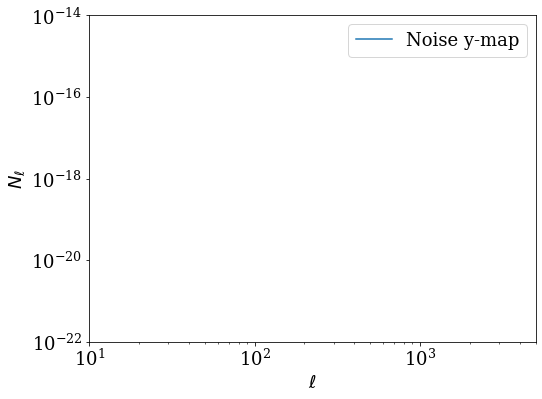

In [3]:
yf = hp.read_map('/global/project/projectdirs/des/shivamp/ACTxDESY3_data/act_ymap_releases/v1.0.0/tilec_single_tile_deep56_comptony_map_v1.0.0_rc_joint_healpix.fits')  




/global/u1/s/spandey/self_module_ini/myenv3/lib/python3.7/site-packages/healpy/fitsfunc.py:391: UserWarning: NSIDE = 4096
  warnings.warn("NSIDE = {0:d}".format(nside))
/global/u1/s/spandey/self_module_ini/myenv3/lib/python3.7/site-packages/healpy/fitsfunc.py:400: UserWarning: ORDERING = RING in fits file
  warnings.warn("ORDERING = {0:s} in fits file".format(ordering))
/global/u1/s/spandey/self_module_ini/myenv3/lib/python3.7/site-packages/healpy/fitsfunc.py:428: UserWarning: INDXSCHM = IMPLICIT
  warnings.warn("INDXSCHM = {0:s}".format(schm))


In [4]:
nly_act = hp.anafast(yf)
l_cl = np.arange(len(nly_act))




In [5]:
np.savetxt('/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/data/ACT/act_yy_total_full.txt',np.array([l_cl, nly_act]).T)   




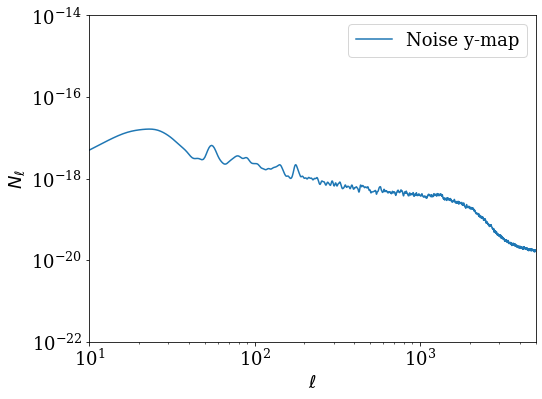

In [6]:
fig, ax = pl.subplots(1,1)
fig.set_size_inches((8,6))  
ax.errorbar(l_cl, nly_act,  label = r'Noise y-map', linestyle='-')

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(1e1,5e3)
ax.set_ylim(1e-22,1e-14)
ax.set_ylabel(r'$N_{\ell}$')
ax.set_xlabel(r'$\ell$')
ax.legend()







In [2]:
nside_out = 512
lmax = 3*nside_out - 1

filename = '/global/project/projectdirs/des/shivamp/ACTxDESY3_data/act_ymap_releases/v1.0.0/tilec_single_tile_deep56_comptony_map_v1.0.0_rc_joint.fits'  
act_ymap_car = enmap.read_map(filename)
act_ymap_hp = reproject.healpix_from_enmap(act_ymap_car, lmax, nside_out)



/global/u1/s/spandey/self_module_ini/myenv3/lib/python3.7/site-packages/healpy/sphtfunc.py:824: UserWarning: Sigma is 0.000000 arcmin (0.000000 rad) 
  sigma * 60 * 180 / np.pi, sigma
/global/u1/s/spandey/self_module_ini/myenv3/lib/python3.7/site-packages/healpy/sphtfunc.py:829: UserWarning: -> fwhm is 0.000000 arcmin
  sigma * 60 * 180 / np.pi * (2.0 * np.sqrt(2.0 * np.log(2.0)))


In [3]:
filename = '/global/project/projectdirs/des/shivamp/ACTxDESY3_data/act_ymap_releases/v1.0.0/tilec_mask.fits'  
act_ymap_car = enmap.read_map(filename)
mask_hp = reproject.healpix_from_enmap(act_ymap_car, lmax, nside_out)



/global/u1/s/spandey/self_module_ini/myenv3/lib/python3.7/site-packages/healpy/sphtfunc.py:824: UserWarning: Sigma is 0.000000 arcmin (0.000000 rad) 
  sigma * 60 * 180 / np.pi, sigma
/global/u1/s/spandey/self_module_ini/myenv3/lib/python3.7/site-packages/healpy/sphtfunc.py:829: UserWarning: -> fwhm is 0.000000 arcmin
  sigma * 60 * 180 / np.pi * (2.0 * np.sqrt(2.0 * np.log(2.0)))


In [5]:
import pymaster as nmt
mask_hp = nmt.mask_apodization(mask_hp, 0.1, apotype="Smooth")



In [ ]:
hp.mollview(mask_hp)



In [9]:
f_0 = nmt.NmtField(mask_hp, [act_ymap_hp])  
b = nmt.NmtBin.from_nside_linear(nside_out, 20)
cl_00 = nmt.compute_full_master(f_0, f_0, b)





In [5]:
fname = '/global/project/projectdirs/des/shivamp/ACTxDESY3_data/act_ymap_releases/v1.0.0/tilec_single_tile_deep56_comptony_map_v1.0.0_rc_joint_healpix.fits'  

acty = hp.read_map(fname)   



In [6]:
acty_ud = hp.ud_grade(acty, nside)



In [7]:
f_0 = nmt.NmtField(mask_ud, [acty_ud])  
b = nmt.NmtBin.from_nside_linear(nside, 1)
cl_00 = nmt.compute_full_master(f_0, f_0, b)




In [8]:
# import numpy as np
# ell_arr = b.get_effective_ells()
# np.savetxt('/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/data/ACT/act_yy_total_full2.txt',np.array([ell_arr, cl_00[0]]).T)   



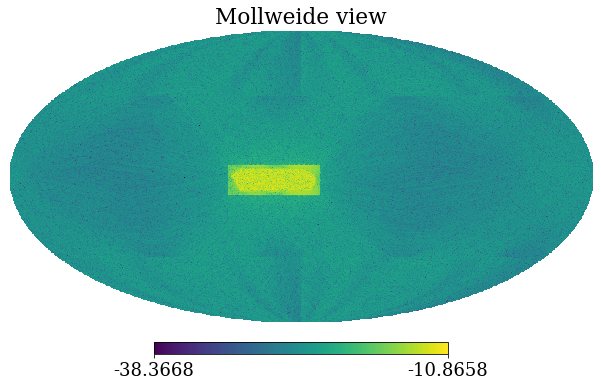

In [29]:
hp.mollview(np.log(np.abs(acty_ud)))




Text(0.5, 0, '$\\ell$')

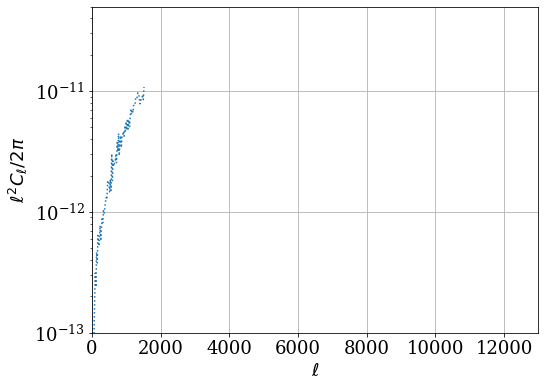

In [8]:
ell_arr = b.get_effective_ells()

fig, ax = pl.subplots(1,1)
fig.set_size_inches((8,6))  
ax.errorbar(ell_arr, (1./(2*np.pi)) * (ell_arr) * (ell_arr) * cl_00[0],   linestyle=':')

# ax.set_xscale('log')
ax.set_yscale('log')
# ax.set_xlim(0,1e4)
ax.set_xlim(0,13000)
ax.grid()
ax.set_ylim(1e-13,5e-11)
# ax.set_ylim(1e-12,1.2e-11)
ax.set_ylabel(r'${\ell^2}C_{\ell}/2\pi$')
ax.set_xlabel(r'$\ell$')
# ax.legend()




In [2]:
clf = np.loadtxt('/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/data/ACT/act_yy_total_full_new_4096.txt')
clf.shape



(491, 2)

In [20]:
import pickle as pk
dfp = pk.load(open('/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/data/cls_20200602_measure_DESxACT-maglim-redmagic-alldeprojy_nside4096.pickle','rb'))  



In [21]:
ellp = dfp['ell']

yellp = dfp[('ymap_no_deproj', 'ymap_no_deproj')][('y', 'y')]['data']


In [22]:
ellp


array([ 199.5,  399.5,  599.5,  799.5,  999.5, 1199.5, 1399.5, 1599.5,
       1799.5, 1999.5, 2199.5, 2399.5, 2599.5, 2799.5, 2999.5, 3199.5,
       3399.5, 3599.5, 3799.5, 3999.5, 4199.5, 4399.5, 4599.5, 4799.5])

In [23]:
sig_beam = 1.6 * (1. / 60.) * (np.pi / 180.) * (1. / np.sqrt(8. * np.log(2)))
Bl = (np.exp(-1. * ellp * (ellp+ 1) * (sig_beam ** 2) / 2.))**(2)


In [24]:
import scipy.interpolate as interpolate
yell_interp = interpolate.interp1d(np.log(ellp), np.log((1./(2*np.pi)) * (ellp ** 2) * Bl * yellp),fill_value='extrapolate')




Text(0.5, 0, '$\\ell$')

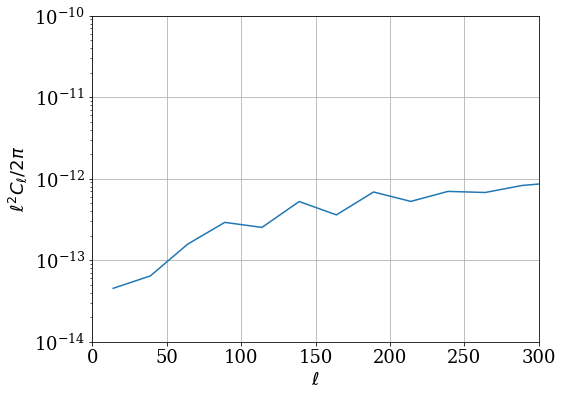

In [4]:
fig, ax = pl.subplots(1,1)
fig.set_size_inches((8,6))  
ax.errorbar(clf[:,0], (1./(2*np.pi)) * (clf[:,0]) * (clf[:,0]) * clf[:,1],   linestyle='-')
# larr = np.logspace(0,np.log10(24000),400)
# ax.errorbar(larr, np.exp(yell_interp(np.log(larr))),  label = r'Noise y-map', linestyle='-')

# ax.set_xscale('log')
ax.set_yscale('log')
# ax.set_xlim(0,1e4)
# ax.set_xlim(0,25000)
ax.set_xlim(0,300)
ax.grid()
ax.set_ylim(1e-14,10e-11)
# ax.set_ylim(1e-12,1.2e-11)
ax.set_ylabel(r'${\ell^2}C_{\ell}/2\pi$')
ax.set_xlabel(r'$\ell$')
# ax.legend()




In [30]:
np.savetxt('/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/data/ACT/act_yy_total_full.txt',np.array([clf[:,0], 85*clf[:,1]]).T)   

